# Perfil de intensidad por recorte lineal E2

En este achivo se encuentra el programa para estudiar la intensidad de luz de una imagen tomando solamente una linea de pixeles a lo ancho de la fotografia.

In [15]:
# Importamos las librerias necesarias
import cv2
from PIL import Image
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray 
import matplotlib.pyplot as plt

## Analisis para una sola imagen 

In [16]:
# Cargamos imagen, se convierte a matriz
image = imread('../Malus/PP9.png')
# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

(1024, 1280, 4)


In [17]:
# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

In [18]:
# Convertimos la imagen a escala de grises
image = rgb2gray(image)

print(type(image))

# Shape of the image
print("Shape of the image", image.shape)

<class 'numpy.ndarray'>
Shape of the image (1024, 1280)


### Recortamos de manera lineal

In [19]:
linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

# Convertimos la línea de píxeles en un DataFrame de Pandas
df_linea_pixeles = pd.DataFrame({
    'Pixel': np.arange(len(linea_pixeles)),
    'Intensidad': linea_pixeles
})

# Obtenemos la intensidad máxima y la intensidad promedio de la línea de píxeles
intensidad_maxima = df_linea_pixeles['Intensidad'].max()
intensidad_promedio = df_linea_pixeles['Intensidad'].mean()

print("Intensidad máxima de la línea de píxeles:", intensidad_maxima)
print("Intensidad promedio de la línea de píxeles:", intensidad_promedio)

# Mostramos el DataFrame resultante
print(df_linea_pixeles)


Intensidad máxima de la línea de píxeles: 0.9999999403953552
Intensidad promedio de la línea de píxeles: 0.35705853
      Pixel  Intensidad
0         0    0.019898
1         1    0.019898
2         2    0.019898
3         3    0.019898
4         4    0.019898
...     ...         ...
1275   1275    0.018782
1276   1276    0.018782
1277   1277    0.019348
1278   1278    0.017376
1279   1279    0.017376

[1280 rows x 2 columns]


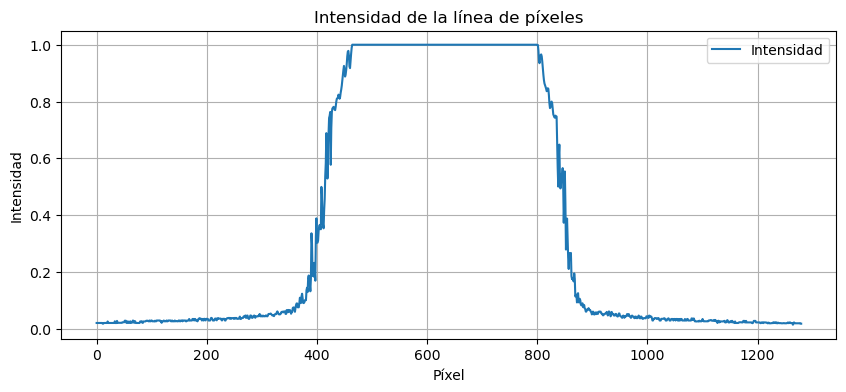

In [20]:
# Graficamos la intensidad de cada pixel en la línea seleccionada
plt.figure(figsize=(10, 4))
plt.plot(df_linea_pixeles['Pixel'], df_linea_pixeles['Intensidad'], label='Intensidad')
plt.xlabel('Píxel')
plt.ylabel('Intensidad')
plt.title('Intensidad de la línea de píxeles')
plt.grid(True)
plt.legend()
plt.show()

### Mostramos el histograma y la imagen original

In [21]:
# Obtenemos los histogramas
hist_image, bins_image = imhist(image)

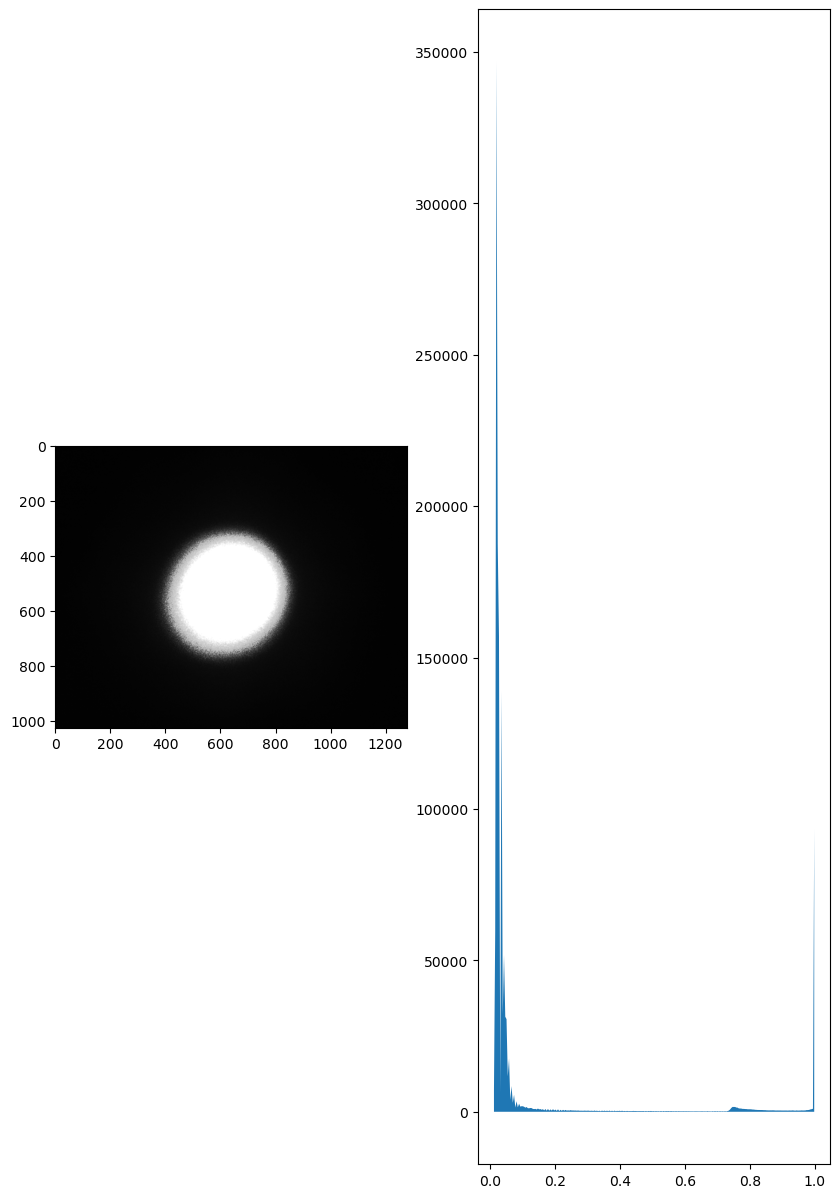

In [22]:
# Visualizamos
_, (image0, hist0), = subplots(1, 2, figsize=(10, 15))

# Original
image0.imshow(image, cmap="gray")
hist0.fill_between(bins_image, hist_image)